In [192]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

In [193]:
#table plots
ticker = yf.Ticker('PINS')
# get data of the most recent date
# **************************
#aapl_df = ticker.history(period='1y')
# ****************************
days = "300"
df = ticker.history(period= days + 'd')# get data of the most recent date

# endDate = dt.datetime.now()
# startDate = endDate -dt.timedelta(days = 436)
# data_frame = yf.download(['PINS'], startDate)


In [194]:
stock_close_data = df['Close']
print(stock_close_data)
# stock_close_data.tail
# print("*******************")
# df_close_data = data_frame['Adj Close']
# print(df_close_data)


Date
2023-02-15 00:00:00-05:00    25.379999
2023-02-16 00:00:00-05:00    24.840000
2023-02-17 00:00:00-05:00    24.430000
2023-02-21 00:00:00-05:00    24.450001
2023-02-22 00:00:00-05:00    25.139999
                               ...    
2024-04-19 00:00:00-04:00    32.400002
2024-04-22 00:00:00-04:00    32.730000
2024-04-23 00:00:00-04:00    33.020000
2024-04-24 00:00:00-04:00    32.849998
2024-04-25 00:00:00-04:00    32.639999
Name: Close, Length: 300, dtype: float64


In [195]:
log_returns = np.log(1+stock_close_data.pct_change())#obtains simple returns from a provided dataset 
print(log_returns)
# log_returns.tail()

# df_log_returns = np.log(1+df_close_data.pct_change())#obtains simple returns from a provided dataset 
# print(df_log_returns)

Date
2023-02-15 00:00:00-05:00         NaN
2023-02-16 00:00:00-05:00   -0.021506
2023-02-17 00:00:00-05:00   -0.016643
2023-02-21 00:00:00-05:00    0.000818
2023-02-22 00:00:00-05:00    0.027830
                               ...   
2024-04-19 00:00:00-04:00   -0.015618
2024-04-22 00:00:00-04:00    0.010134
2024-04-23 00:00:00-04:00    0.008821
2024-04-24 00:00:00-04:00   -0.005162
2024-04-25 00:00:00-04:00   -0.006413
Name: Close, Length: 300, dtype: float64


<Axes: xlabel='Date'>

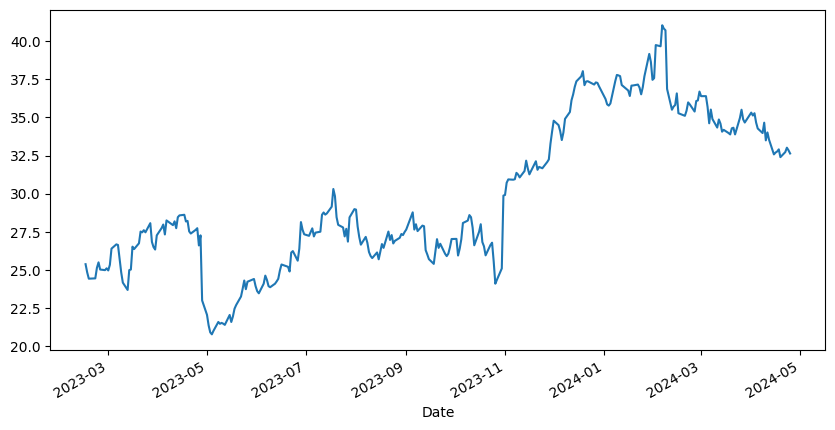

In [196]:
stock_close_data.plot(figsize=(10,5))

In [197]:
# df_close_data.plot(figsize=(10,5))

<Axes: xlabel='Date'>

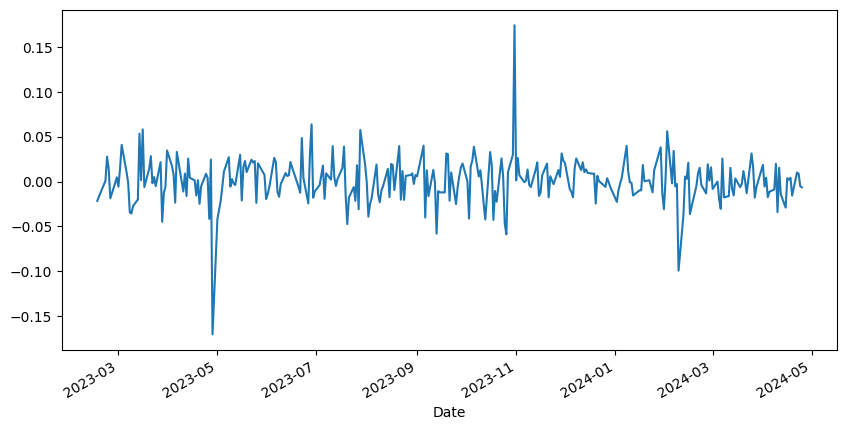

In [198]:
log_returns.plot(figsize=(10,5))
# df_log_returns.plot(figsize=(10,5))

In [199]:
u = log_returns.mean()
# u = df_log_returns.mean()
print(type(u))
print(u)

<class 'numpy.float64'>
0.0008413949236685281


In [200]:
var = log_returns.var()
# var = df_log_returns.var()
print(type(var))
print(var)

<class 'numpy.float64'>
0.0006627170058114612


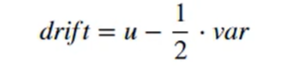
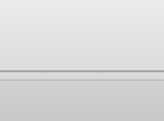

In [201]:
drift = u - 1/2 * var 
print(type(drift))
print(drift)

<class 'numpy.float64'>
0.0005100364207627976


In [202]:
stdev = log_returns.std()
print(stdev)

0.02574329050085597


brownian motion 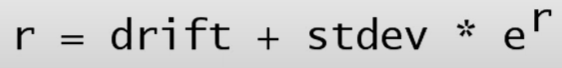

In [203]:
type(drift)
type(stdev)

numpy.float64

In [204]:
np.array(drift)


array(0.00051004)

In [205]:
norm.ppf(0.95) #percent chance of occuring
x = np.random.rand(10,2)
print(x)
norm.ppf(x)

[[0.70295703 0.01904698]
 [0.99608779 0.92002231]
 [0.0139822  0.8572488 ]
 [0.36202904 0.08799112]
 [0.29282834 0.84569155]
 [0.0108467  0.88912889]
 [0.59893032 0.62000945]
 [0.05645744 0.20134108]
 [0.39418504 0.34302628]
 [0.55575873 0.16119696]]


array([[ 0.53292437, -2.07384219],
       [ 2.65955422,  1.40522162],
       [-2.19778538,  1.06804014],
       [-0.3530405 , -1.35322974],
       [-0.54514079,  1.01812848],
       [-2.29569379,  1.22190854],
       [ 0.25057933,  0.3055056 ],
       [-1.58522651, -0.83684061],
       [-0.26842776, -0.40421782],
       [ 0.1402246 , -0.98955041]])

In [206]:
z = norm.ppf(np.random.rand(10,2)) # z corecponds to the distance between the mean and the events, expressed as the number of standard deviations
z

array([[-0.26192168, -1.08729548],
       [-0.49163504,  0.13780138],
       [ 1.92711249,  0.77530619],
       [ 0.19077854,  0.74524765],
       [-0.38980364, -1.12590379],
       [ 1.50057298,  0.01705664],
       [-0.09328071,  1.20371842],
       [ 0.97264611, -0.57605598],
       [ 0.41757955, -0.28218853],
       [-0.98724636, -0.341591  ]])

In [221]:
t_intervals = 1000 #forcasting the stock price of future 1000 days
iterations = 20 #series of future stock predictions

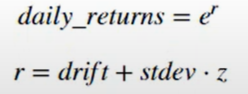

In [222]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.00213028, 0.98211383, 1.02365102, ..., 1.01390644, 1.00769144,
        0.96834336],
       [1.025937  , 0.9544021 , 1.00868222, ..., 0.9822401 , 1.03400939,
        0.98557697],
       [1.01730195, 1.01581011, 0.99960002, ..., 1.00612679, 1.01152928,
        0.97632886],
       ...,
       [1.03072019, 1.01148706, 0.94975493, ..., 0.96739114, 1.00743416,
        1.0359336 ],
       [1.03653055, 1.03475266, 0.94121941, ..., 0.99383113, 1.00099278,
        0.99520424],
       [0.99205799, 0.9942408 , 0.95527823, ..., 1.01541383, 0.98377658,
        1.01598417]])

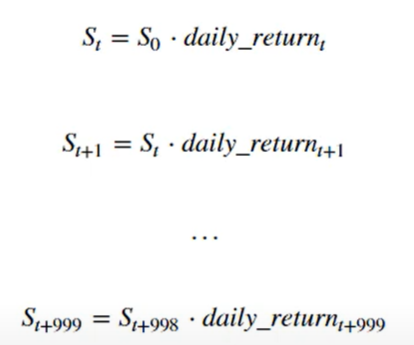

In [223]:
S0 = stock_close_data.iloc[-1]
S0

32.63999938964844

In [224]:
price_list = np.zeros_like(daily_returns)
price_list


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [225]:
price_list[0] = S0
price_list

array([[32.63999939, 32.63999939, 32.63999939, ..., 32.63999939,
        32.63999939, 32.63999939],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [226]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

price_list

array([[ 32.63999939,  32.63999939,  32.63999939, ...,  32.63999939,
         32.63999939,  32.63999939],
       [ 33.48658305,  31.15168385,  32.92338699, ...,  32.0603164 ,
         33.75006577,  32.16923158],
       [ 34.0659662 ,  31.6441955 ,  32.91021816, ...,  32.25674325,
         34.1391798 ,  31.40774906],
       ...,
       [ 34.18611054,  89.36308951, 173.78624762, ...,  36.30722985,
         61.28416943,  73.53394823],
       [ 35.43494795,  92.46869437, 163.57098921, ...,  36.08325541,
         61.34501083,  73.18129697],
       [ 35.15352335,  91.93614901, 156.25580491, ...,  36.63943641,
         60.34978477,  74.35103946]])

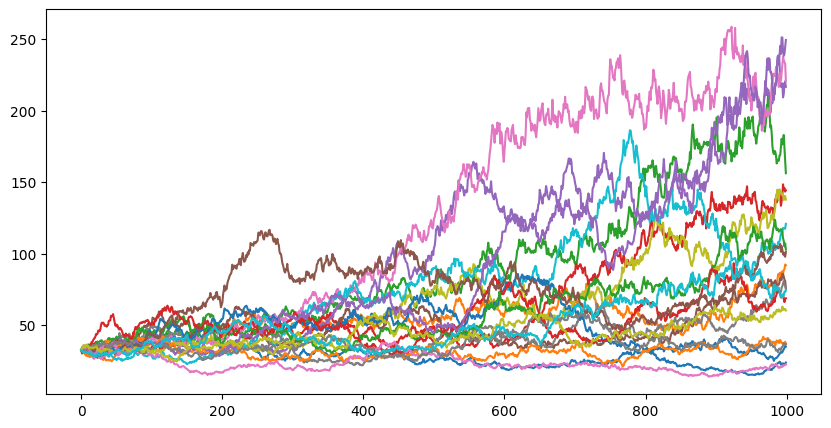

In [227]:
plt.figure(figsize=(10,5))
plt.plot(price_list)